In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as python_random
import tensorflow as tf
import seaborn as sns

sns.set_theme(color_codes=True)
import random

sys.path.insert(0, ".././0.data-download/scripts/")
from data_loader import load_train_test_data, load_data
from matplotlib.pyplot import figure, gcf
from sklearn.decomposition import PCA
from tensorflow import keras
from vae import VAE
from keras.models import Model, Sequential

2023-01-27 15:13:39.635526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random.seed(18)
print(random.random())

0.18126486333322134


In [3]:
random.seed(18)
print(random.random())

0.18126486333322134


In [4]:
# load the data
data_directory = pathlib.Path("../0.data-download/data")
train_init, test_init, gene_stats = load_train_test_data(
    data_directory, train_or_test="all", load_gene_stats=True
)

In [5]:
# drop the string values
train_df = train_init.drop(columns=["DepMap_ID", "age_and_sex"])
test_df = test_init.drop(columns=["DepMap_ID", "age_and_sex"])

In [6]:
# subsetting the genes
# create dataframe containing the 1000 genes with the largest variances and their corresponding gene label and extract the gene labels
largest_var_df = gene_stats.nlargest(1000, "variance")
gene_list = largest_var_df["gene_ID"].tolist()
gene_list

# create new training and testing dataframes that contain only the corresponding genes
subset_train_df = train_df.filter(gene_list, axis=1)
subset_test_df = test_df.filter(gene_list, axis=1)

In [7]:
print(subset_train_df.shape)
subset_train_df.head(3)

(751, 1000)


,GPX4 (2879),CDK6 (1021),CCND1 (595),ITGAV (3685),FBXW11 (23291),FERMT2 (10979),PCYT1A (5130),SCAP (22937),TYMS (7298),CFLAR (8837),...,TRAIP (10293),SPTLC2 (9517),SIVA1 (10572),ARF6 (382),MTX2 (10651),SUDS3 (64426),RFWD3 (55159),PEF1 (553115),VDAC2 (7417),EIF3L (51386)
0,0.463823,0.014317,0.161896,0.085363,0.298268,0.051738,0.932488,0.876329,0.426153,0.360063,...,0.592945,0.040897,0.028690,0.255672,0.049467,0.686069,0.095030,0.379675,0.147619,0.312850
1,0.972063,0.064748,0.022768,0.977996,0.976181,0.875408,0.895123,0.094826,0.058741,0.812678,...,0.854894,0.143725,0.021591,0.383889,0.142221,0.655798,0.159654,0.438015,0.443068,0.244777
2,0.983013,0.987171,0.014462,0.011497,0.945816,0.122422,0.989659,0.990821,0.308549,0.088603,...,0.897589,0.684485,0.361767,0.869974,0.262962,0.402732,0.953677,0.385210,0.237527,0.841037


In [8]:
print(subset_test_df.shape)
subset_test_df.head(3)

(133, 1000)


,GPX4 (2879),CDK6 (1021),CCND1 (595),ITGAV (3685),FBXW11 (23291),FERMT2 (10979),PCYT1A (5130),SCAP (22937),TYMS (7298),CFLAR (8837),...,TRAIP (10293),SPTLC2 (9517),SIVA1 (10572),ARF6 (382),MTX2 (10651),SUDS3 (64426),RFWD3 (55159),PEF1 (553115),VDAC2 (7417),EIF3L (51386)
0,0.843742,0.283810,0.941577,0.996565,0.992670,0.971852,0.331270,0.039042,0.586814,0.182726,...,0.962914,0.122600,0.055387,0.193870,0.160739,0.621019,0.459644,0.685886,0.329888,0.212550
1,0.968403,0.031842,0.026362,0.999368,0.086760,0.976968,0.870871,0.554008,0.413046,0.230640,...,0.781397,0.900710,0.010781,0.910202,0.086714,0.670193,0.278292,0.713822,0.265914,0.167114
2,0.845370,0.403622,0.507205,0.660745,0.672061,0.895860,0.547123,0.685342,0.086716,0.666695,...,0.942949,0.136824,0.714577,0.278318,0.116243,0.737946,0.685493,0.696300,0.068160,0.288178


In [9]:
encoder_architecture = []
decoder_architecture = []

In [10]:
# These optimal parameter values were fetched by running "optimize_hyperparameters.py" and then running "fetch_hyper_params.ipynb" to learn the best hyperparamaters to use in the VAE.
trained_vae = VAE(
    input_dim=subset_train_df.shape[1],
    latent_dim=100,
    batch_size=112,
    encoder_batch_norm=True,
    epochs=905,
    learning_rate=0.005,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=10,
    lam=0,
    verbose=True,
)

trained_vae.compile_vae()

2023-01-27 15:14:09.363919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
trained_vae.train(x_train=subset_train_df, x_test=subset_test_df)

Epoch 1/905
7/7 [==============================] - 1s 41ms/step - loss: 968.8439 - recon: 499.1279 - kl: 469.7161 - val_loss: 10938.8896 - val_recon: 3275.7412 - val_kl: 7663.1489
Epoch 2/905
7/7 [==============================] - 0s 13ms/step - loss: 583.6282 - recon: 237.2856 - kl: 346.3427 - val_loss: 23037.2969 - val_recon: 5407.6411 - val_kl: 17629.6543
Epoch 3/905
7/7 [==============================] - 0s 11ms/step - loss: 433.4329 - recon: 157.0935 - kl: 276.3395 - val_loss: 19275.3945 - val_recon: 4866.2783 - val_kl: 14409.1162
Epoch 4/905
7/7 [==============================] - 0s 11ms/step - loss: 364.4038 - recon: 132.9118 - kl: 231.4920 - val_loss: 9260.0283 - val_recon: 2083.8552 - val_kl: 7176.1729
Epoch 5/905
7/7 [==============================] - 0s 10ms/step - loss: 322.4713 - recon: 121.6606 - kl: 200.8107 - val_loss: 5004.3604 - val_recon: 1304.3589 - val_kl: 3700.0017
Epoch 6/905
7/7 [==============================] - 0s 10ms/step - loss: 292.3371 - recon: 112.9134 -

In [12]:
# display training history
history_df = pd.DataFrame(trained_vae.vae.history.history)

# save the training history as a .csv
hist_dir = pathlib.Path("./results/beta_vae_training_history.csv")
history_df.to_csv(hist_dir, index=False)

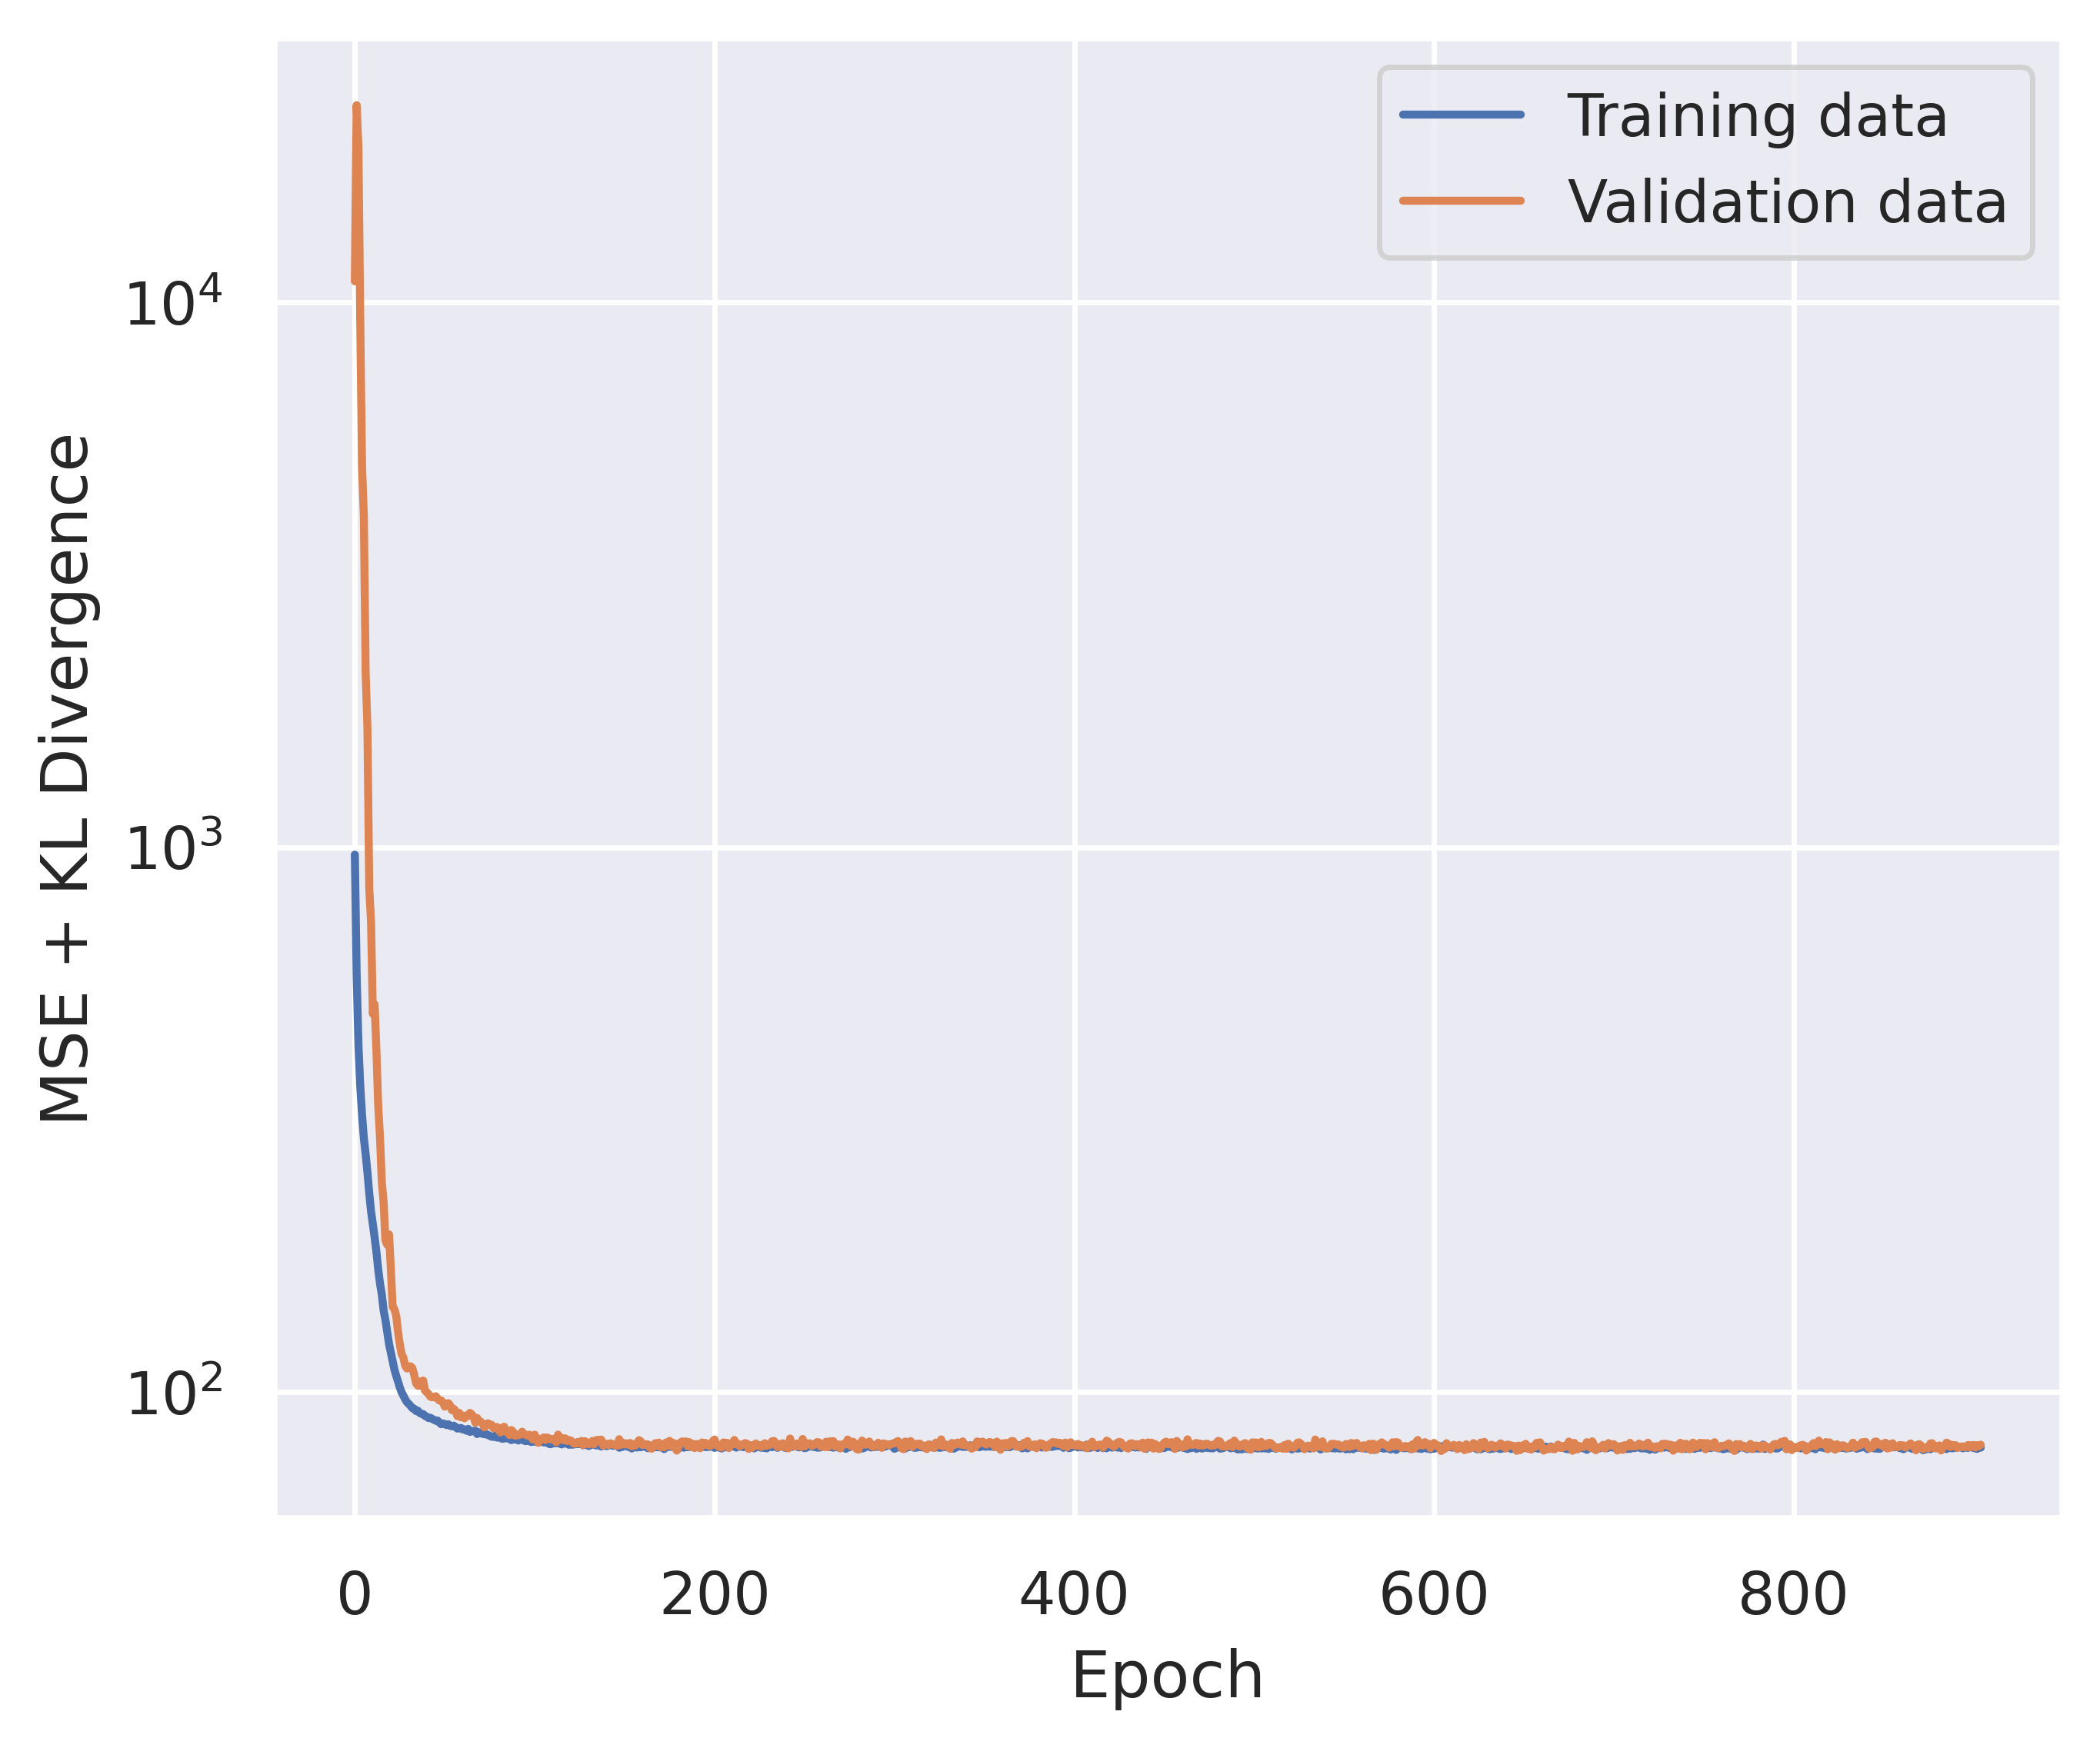

In [13]:
# plot and save the figure
save_path = pathlib.Path("../1.data-exploration/figures/training_curve.png")

plt.figure(figsize=(6, 5), dpi=500)
plt.plot(history_df["loss"], label="Training data")
plt.plot(history_df["val_loss"], label="Validation data")
plt.yscale("log")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("Epoch")
plt.legend()
plt.savefig(save_path)
plt.show()

In [14]:
trained_vae.vae
trained_vae.vae.evaluate(subset_test_df)

5/5 [==============================] - 0s 3ms/step - loss: 79.9510 - recon: 76.3308 - kl: 3.6202


[79.9509506225586, 76.33076477050781, 3.6201913356781006]

In [15]:
encoder = trained_vae.encoder_block["encoder"]
decoder = trained_vae.decoder_block["decoder"]

In [16]:
data_dir = "../0.data-download/data/"
model_df, dependency_df = load_data(data_dir, adult_or_pediatric="all")

In [17]:
train_init["train_or_test"] = train_init.apply(lambda _: "train", axis=1)
test_init["train_or_test"] = test_init.apply(lambda _: "test", axis=1)

In [18]:
# create a data frame of both test and train gene dependency data sorted by top 1000 highest gene variances
concat_frames = [train_init, test_init]
train_and_test = pd.concat(concat_frames).reset_index(drop=True)
train_and_test[["age_category", "sex"]] = train_and_test.age_and_sex.str.split(
    pat="_", expand=True
)
train_and_test_subbed = train_and_test.filter(gene_list, axis=1)
metadata_holder = []
metadata_holder = pd.DataFrame(metadata_holder)
metadata = metadata_holder.assign(
    DepMap_ID=train_and_test.DepMap_ID.astype(str),
    age_category=train_and_test.age_category.astype(str),
    sex=train_and_test.sex.astype(str),
    train_or_test=train_and_test.train_or_test.astype(str),
)
metadata

,DepMap_ID,age_category,sex,train_or_test
0,ACH-000438,Adult,Male,train
1,ACH-000903,Adult,Male,train
2,ACH-000271,Adult,Male,train
3,ACH-000055,Pediatric,Male,train
4,ACH-000757,Adult,Male,train
...,...,...,...,...
879,ACH-000984,Adult,Female,test
880,ACH-000420,Adult,Male,test
881,ACH-000490,Adult,Female,test
882,ACH-000957,Adult,Female,test


In [19]:
latent_complete = np.array(encoder.predict(train_and_test_subbed)[2])
latent_df = pd.DataFrame(latent_complete)
latent_df_dir = pathlib.Path("./results/latent_df.csv")
latent_df.to_csv(latent_df_dir)

28/28 [==============================] - 0s 1ms/step


In [20]:
latent_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.094060,-1.597280,-0.510932,-0.795493,0.111226,-1.556570,-0.296726,-1.139462,0.710714,-1.341058,...,-0.723464,-1.291553,1.022173,0.614023,0.134677,0.629250,-0.927897,-0.323359,0.877461,-0.778722
1,1.844677,-0.525691,-1.078811,-0.900726,-0.251881,0.160747,0.005942,-0.376827,-0.038652,0.541254,...,0.631756,1.148652,0.464380,-1.686952,-0.510538,-0.623041,-0.847079,-0.134172,0.157815,-0.218700
2,-0.123559,0.343856,-1.198529,-0.123493,-0.127449,-0.659148,-0.757861,-0.207684,1.341110,-0.929803,...,-1.666956,0.094853,-0.817557,-0.376976,0.795198,0.026386,1.068573,-0.433001,0.787406,-0.294072
3,-0.807814,-0.704092,-0.806472,-0.629140,0.548656,-0.363855,-0.900090,-0.254310,-1.008519,0.433478,...,-0.269485,0.357258,0.000713,0.745026,0.653376,0.938988,0.225605,0.181874,0.463686,2.455370
4,0.444330,0.513183,1.311209,1.616204,0.663042,-0.463704,-0.259796,0.510869,0.128390,-0.136458,...,0.705463,1.853301,-1.319132,-0.492825,-0.117144,0.773405,-0.236367,1.412835,-0.397956,0.788766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,-1.884330,-0.696500,-1.623661,1.347905,-0.750823,0.586078,-0.238671,-1.548054,-0.669598,-0.065846,...,0.404821,2.406209,0.355490,0.378005,1.099052,-0.394834,-2.131948,1.639866,-1.238714,-0.860905
880,0.148023,-1.298786,0.441769,0.379508,-0.500484,-1.435086,0.916593,-0.034791,0.434860,-0.398283,...,-2.433714,0.718834,-0.737584,0.861835,0.426771,0.165345,-0.837292,1.009666,0.717661,0.142957
881,0.251821,-1.044297,-1.216058,-3.024226,0.379742,1.277469,1.003579,0.501690,0.866044,1.121697,...,0.310502,-0.301220,0.136362,0.768557,-0.085179,0.136389,-0.987723,-0.271140,0.073590,-0.881173
882,-0.363090,-0.080093,-2.224333,0.670409,-1.682416,-0.459555,-0.127305,-2.146977,1.157523,0.291570,...,0.607139,-0.390857,-0.402720,-0.184994,0.298865,0.456717,0.758025,-1.496317,1.117006,-0.231071


In [21]:
age_category = metadata.pop("age_category")
sex = metadata.pop("sex")
train_test = metadata.pop("train_or_test")

/home/rosedoss/anaconda3/envs/gene_dependency_representations/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


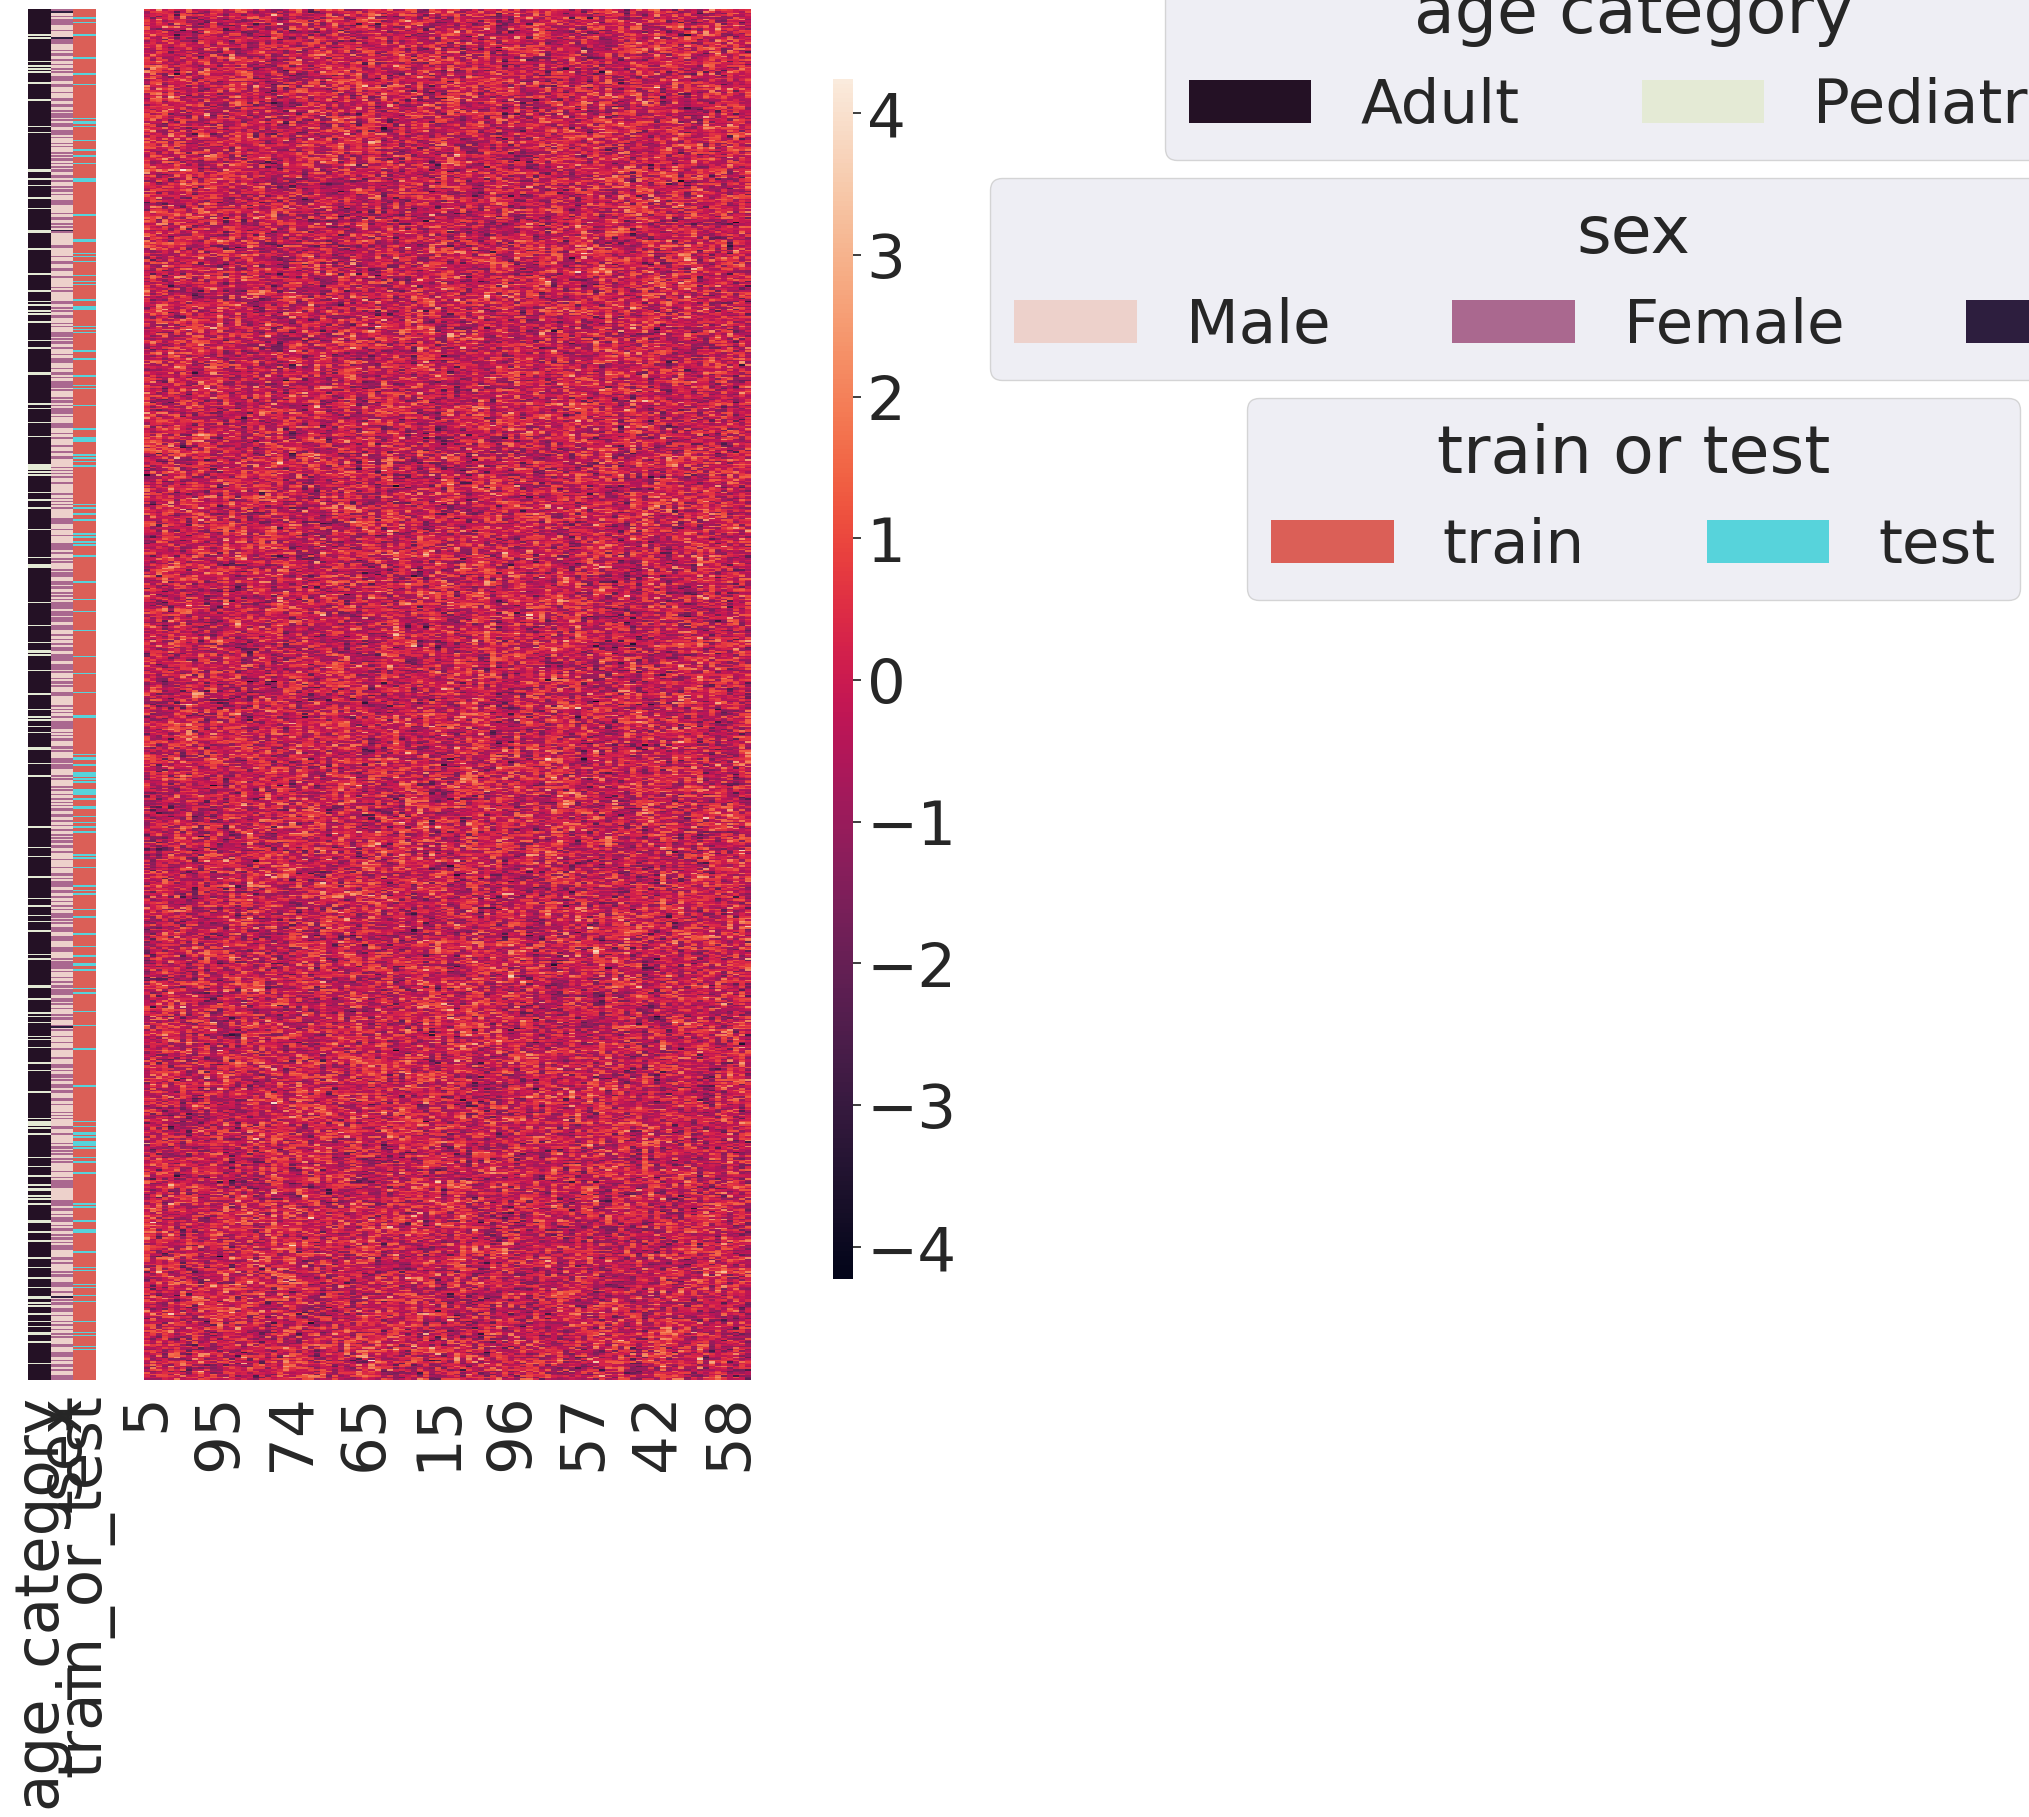

In [22]:
# display clustered heatmap of coefficients
lut_pal = sns.cubehelix_palette(
    age_category.unique().size, light=0.9, dark=0.1, reverse=True, start=1, rot=-2
)
put_pal = sns.cubehelix_palette(sex.unique().size)
mut_pal = sns.color_palette("hls", train_test.unique().size)

lut = dict(zip(age_category.unique(), lut_pal))
put = dict(zip(sex.unique(), put_pal))
mut = dict(zip(train_test.unique(), mut_pal))

row_colors1 = age_category.map(lut)
row_colors2 = sex.map(put)
row_colors3 = train_test.map(mut)

network_node_colors = pd.DataFrame(row_colors1).join(
    pd.DataFrame(row_colors2).join(pd.DataFrame(row_colors3))
)

sns.set(font_scale=4.0)
g = sns.clustermap(
    latent_df,
    method="ward",
    figsize=(10, 20),
    row_colors=network_node_colors,
    yticklabels=False,
    dendrogram_ratio=(0.1, 0.04),
    cbar_pos=(1, 0.3, 0.02, 0.6),
)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)


xx = []
for label in age_category.unique():
    x = g.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
    xx.append(x)
# add the legend
legend3 = plt.legend(
    xx,
    age_category.unique(),
    loc="center",
    title="age category",
    ncol=2,
    bbox_to_anchor=(1.8, 0.91),
    bbox_transform=gcf().transFigure,
)


yy = []
for label in sex.unique():
    y = g.ax_row_dendrogram.bar(0, 0, color=put[label], label=label, linewidth=0)
    yy.append(y)
# add the second legend
legend4 = plt.legend(
    yy,
    sex.unique(),
    loc="center",
    title="sex",
    ncol=3,
    bbox_to_anchor=(1.8, 0.8),
    bbox_transform=gcf().transFigure,
)
plt.gca().add_artist(legend3)


zz = []
for label in train_test.unique():
    z = g.ax_row_dendrogram.bar(0, 0, color=mut[label], label=label, linewidth=0)
    zz.append(z)
# add the third legend
legend5 = plt.legend(
    zz,
    train_test.unique(),
    loc="center",
    title="train or test",
    ncol=2,
    bbox_to_anchor=(1.8, 0.69),
    bbox_transform=gcf().transFigure,
)
plt.gca().add_artist(legend4)


# save the figure
heat_save_path = pathlib.Path("../1.data-exploration/figures/heatmap.png")
plt.savefig(heat_save_path, bbox_inches="tight", dpi=600)